### Part 1 ‑ Exploratory Data Analysis
    Instructions:

    The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic 
    location.

    Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting 
    time series of login counts in ways that best characterize the underlying patterns of the demand.

    Please report/illustrate important features of the demand, such as daily cycles. If there are data 
    quality issues, please report them.

    We use pandas and numpy to analyze our data. We use seaborn with matplotlib to visualize our data.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logins_df = pd.read_json('logins.json')

In [3]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Checking the df
logins_df.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


Note: The data is from Jan 1, 1970 - April 13, 1970. Thus, we have 3.5 months worth of data with the last two weeks of April missing

In [5]:
# Checking the df
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
# Set index to be 'login_time'
indexed_logins_df = logins_df.set_index(['login_time'])
indexed_logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
# Count in 15 min intervals 
indexed_logins_df['count'] = 1
indexed_logins_df_15T = indexed_logins_df.resample('15T').count()
indexed_logins_df_15T = indexed_logins_df_15T.reset_index()
indexed_logins_df_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

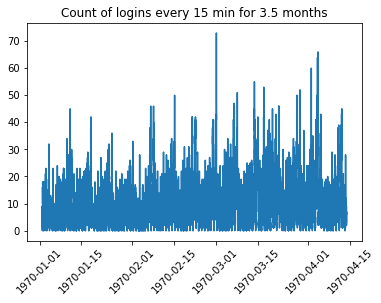

In [8]:
# Plot the 15 min interval login_time over the 3.5 months
x = indexed_logins_df_15T['login_time']
y = indexed_logins_df_15T['count']
plt.plot(x,y)
plt.title('Count of logins every 15 min for 3.5 months')
plt.xticks(rotation=45)

We see regular interval spikes, indicating that at certain times of the month login's increased. I suspect that the spike is due to weekend logins. 

In [9]:
# First look at differences between months, by aggregating the data into months

jan = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-01')
                           & (indexed_logins_df_15T.login_time < '1970-02')]
feb = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-02')
                           & (indexed_logins_df_15T.login_time < '1970-03')]
mar = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-03')
                           & (indexed_logins_df_15T.login_time < '1970-04')]
apr = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-04')
                           & (indexed_logins_df_15T.login_time < '1970-05')]

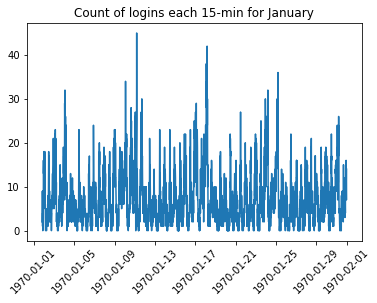

In [10]:
# January
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for January')
plt.xticks(rotation=45);

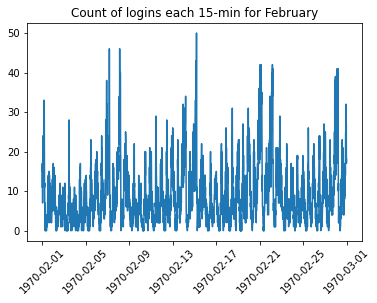

In [11]:
# February
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for February')
plt.xticks(rotation=45);

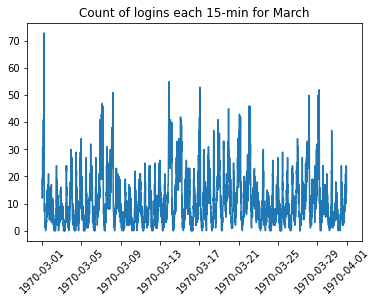

In [12]:
# March
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for March')
plt.xticks(rotation=45);

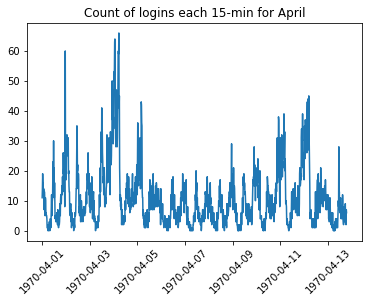

In [13]:
# April
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for April')
plt.xticks(rotation=45);

After looking at the monthly data there does not seem to be no trend for weekly logins. Next is to dive deeper in to changes during the week

In [14]:
# Count based on weekday: 0 = Monday, 6 = Sunday
indexed_logins_df_15T['weekday'] = indexed_logins_df_15T['login_time'].dt.dayofweek
wkday = indexed_logins_df_15T.sort_values(by='count', ascending=False)
wkday_count = wkday[['count','weekday']]
wkday_count = wkday_count.groupby('weekday').sum().reset_index()
wkday_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


Note: we see that the is a disporportinate number of entries per a weekday, thus, some days (Monday and Tuesday) show significantly less logins

In [15]:
# Naming the weekdays
wkday_count['weekday'] = ['Mon', 'Tues', 'Wed','Thurs',
                          'Fri', 'Sat', 'Sun']
wkday_count = wkday_count[['weekday', 'count']]
wkday_count

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


With the naming it is easier to see that there is a trend with higher logins during the weekend

Text(0.5, 1.0, 'Count of logins vs. Weekday for 3.5 Months')

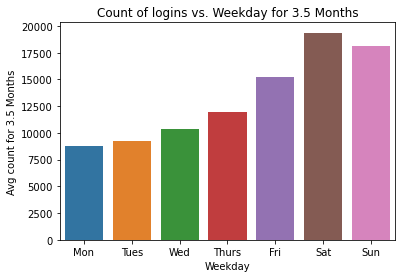

In [16]:
# Visualizing count of logins vs. weekday
sns.barplot(x='weekday', y='count', data=wkday_count, )
plt.ylabel('Avg count for 3.5 Months')
plt.xlabel('Weekday')
plt.title('Count of logins vs. Weekday for 3.5 Months')

Now lets go a step further and look at logins by hour 

In [17]:
# Splitting into hours
indexed_logins_df_15T['hour'] = indexed_logins_df_15T['login_time'].dt.hour
hours = indexed_logins_df_15T
hour = hours[['count','hour']]
hour = hour.groupby('hour').sum().reset_index()
hour

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


Text(0.5, 1.0, 'Average count of logins vs. Hour of day for 3.5 Months')

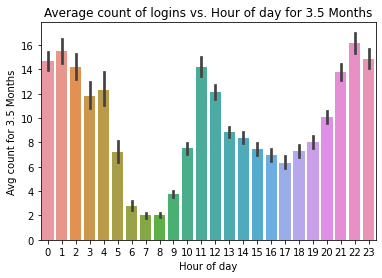

In [18]:
# Visualizing count of logins per hour of the day
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Avg count for 3.5 Months')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of day for 3.5 Months')

We see that there is an increae in logins from 11am-12pm (lunch), and late at night 9pm-4am

Now lets go into the orginal question and look at the 15 min intervals

In [19]:
# Splitting into 15 minute intervals
indexed_logins_df_15T['15_minute'] = indexed_logins_df_15T['login_time'].dt.minute
minutes = indexed_logins_df_15T
minute = minutes[['count', '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
minute

,15_minute,count
0,0,22660
1,15,22975
2,30,23962
3,45,23545


The averages for the 15 minute intervals seems to be stable, thus, not meaningful information.

Text(0.5, 1.0, 'Avg count of logins vs. Minute of hour for 3.5 Months')

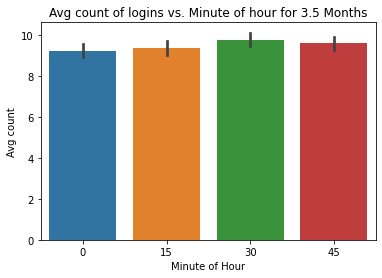

In [20]:
# Visualizing count of logins per quarter-hour
sns.barplot(x='15_minute', y='count', data=minutes)
plt.ylabel('Avg count')
plt.xlabel('Minute of Hour')
plt.title('Avg count of logins vs. Minute of hour for 3.5 Months')

#### Conclusions for Part 1:
    1. Amount of user-logins increase and peak torwards the weekend.
    2. Amount of user-logins increase during lunch time (11am to 12pm) and during late-night (9 pm - 4 am)

# Part 2: Experiment and Metric Design 

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

how you will implement the experiment.
what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

    Solution:

    First, we talk about why the Ultimate managers want more driver partners to be available in both cities.

    To increase driver/rider acceptance-rates
    To increase driver/rider sign-ups
    To reduce driver/rider wait times
    To increase profit
    Ultimately, increasing acceptance-rates and sign-ups while reducing wait times would lead to profit. (No pun intended) In order to increase profit, the additional income brought in during the experiment must outweigh the toll cost reimbursements. We would use the key metric of profit after reimbursement.

    There are two tests that we could do depending on the time and budget available. A simple study could be an A/B study. We would randomly select half of the drivers to participate in the study while we leave out the other half. After a few months, we compare the profit made after reimbursement of toll costs. A more robust study could last a year. All driver partners are included in the study and the profit made for the year is compared to the previous years with time series analysis.

    After getting our results, we would use a t-test to test for significance (p = 0.05) between each group.

    The results of this experiment all depend on what we started it for. An increase in profits. If profits decreased after the experiment, it would mean that reimbursement of toll fees may not have been the most effective way to encourage drivers to be active in both cities in order to increase profits. There may have been exploitations of the incentive or worse. If profits stay the same, then the feature should be left intact due to the possible convenience to some drivers. Finally, if profits increase, it could mean that more experiments relating reimbursements such as gas or mileage will increase profits even further.



### Part 3: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Data description

    city: city this user signed up in
    phone: primary device for this user
    signup_date: date of account registration; in the form ‘YYYY MM DD’
    last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    avg_rating_by_driver: the rider’s average rating over all of their trips
    avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    surge_pct: the percent of trips taken with surge multiplier > 1
    avg_surge: The average surge multiplier over all of this user’s trips
    trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
    ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
    weekday_pct: the percent of the user’s trips occurring during a weekday

### 1. Data Cleaning

In [21]:
file = open('ultimate_data_challenge.json')
df = pd.read_json(file)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
# Get description of each feature
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [23]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We see several missing values in avg_rating_of_driver, phone, & avg_rating_by_driver.
Since there are few missing values and two of them are average based we will use mean replacement method to fill missing values, and a fill na method for phone.

In [24]:
# Input missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace = True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace = True)
df['phone'].fillna('iPhone', inplace = True)

In [25]:
# Verify datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Great! Now we have 50,000 non-null values

In [26]:
# Convert objects to dates
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Data Visualization 

The purpose of data visualization here is to simply visualize data distribution. If our model depends on a certain feature to increase retention rate, we look back at our visualizations to see if improvements could be made or not.

The most interesting feature availible for us to use is 'trips_in_first_30_days' because it indicates the number of trips a user takes in their first 30 days and is a measure of retention. 

We want to see the relationship 'trips_in_first_30_days' has with other features.

In [27]:
# Create dataframe for city and trips
trips_city = (df[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5, 1.0, 'Trips vs. City')

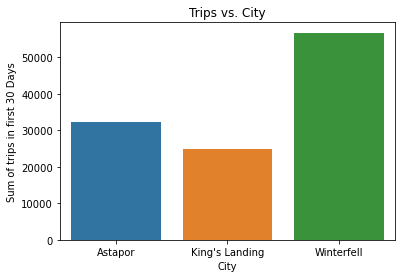

In [28]:
# Constructing barplot
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')

In [29]:
# Create dataframe for phone and trips
trips_phone= df[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


<AxesSubplot:xlabel='phone', ylabel='trips_in_first_30_days'>

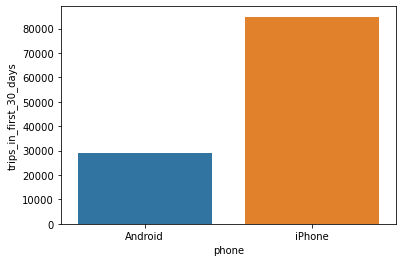

In [30]:
# Constructing barplot
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)

#### Construct a 6-month retention parameter using 'trips_in_first_30_days' and 'last_trip_date'
    If the user has taken a trip in 6-months before our last recorded data point, they are considered a 
    retained user.

In [31]:
# Getting first trip date recorded
df[['last_trip_date']].min()

last_trip_date   2014-01-01
dtype: datetime64[ns]

In [32]:
# Getting last trip date recorded
df[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

In [33]:
# Active users
len(df[df['last_trip_date'] >= '2014-06-01'])

18804

In [34]:
# Non-active users
len(df[df['last_trip_date'] < '2014-06-01'])

31196

In [35]:
# Total users
len(df)

50000

In [36]:
# Creating a retained feature
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [37]:
# Retained users
df['retained'].sum()/len(df)

0.37608

#### Solution: 38% of the users are considered to be retained users

## 2. Building a Predictive Model 

In [38]:
# Import Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

Predictive modeling is based on categorical and numerical features 

In [39]:
# Dropping date-time features for predictive modeling ('last_trip_date' & 'signup_date')
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

In [40]:
# Generate y from saving 'retained' values, retained = returnered users 
y = df['retained'].values

In [41]:
# Dropping 'retained' values
df = df.drop('retained', axis=1)
df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,4.700000,1.10,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,5.000000,1.00,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,4.300000,1.00,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,4.400000,1.19,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.000000,1.00,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,5.000000,1.00,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.5


One-hot encode the categorical string variables (city, phone, ultimate_black_user)

In [42]:
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head(5)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [44]:
# Generate X from encoded values
X = df_encoded.values

In [45]:
# Verify first row of X
X[0]

array([ 4.  ,  4.7 ,  1.1 , 15.4 , 46.2 ,  3.67,  5.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ])

In [46]:
# Verify first row of y (y= retained user)
y[0]

1.0

In [47]:
# Split the data set: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Since we are using Neural Networks the features should be scaled for the deep learning stage

In [48]:
# Inspect the first row of the training set 
X_train[0]

array([ 8.  ,  4.4 ,  1.  ,  0.  , 58.8 ,  4.22,  4.8 ,  0.  ,  0.  ,
        1.  ,  0.  ,  1.  ,  1.  ,  0.  ])

In [49]:
# Feature Scaling with QuantileTransformer, now we have robust features that are uniform and normaly distributed 
scaler = QuantileTransformer() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Verify first row is scaled 
X_train[0]

array([0.94244244, 0.21821822, 0.        , 0.        , 0.43293293,
       0.54254254, 0.32332332, 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        ])

### Predictive Model using Random Forest and Logistic Regression 

In [51]:
# Build Random Forest 
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [52]:
rf.score(X_test, y_test)

0.7584

In [53]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.751  0.7425 0.766  0.763  0.7605]
Mean Cross Validated Score: 0.756


List features of importance based on random forest prediction 

In [54]:
df_importance = pd.DataFrame(zip(list(df_encoded.columns),rf.feature_importances_),
                             index=range(df_encoded.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300495
4,weekday_pct,0.133708
6,avg_rating_by_driver,0.112492
1,avg_rating_of_driver,0.081561
0,trips_in_first_30_days,0.080165
3,surge_pct,0.079618
2,avg_surge,0.069241
8,city_King's Landing,0.046588
10,phone_Android,0.020328
11,phone_iPhone,0.017836


#### Top 3 features of importance:
    avg_dist: the average distance in miles per trip taken in the first 30 days after 
    weekday_pct: the percent of the user’s trips occurring during a weekday
    avg_rating_by_driver: the rider’s average rating over all of their trips

City, Phone, and Ultimate Black User were not features of importnace 

In [55]:
# Extra metrics for the model 
precision_recall_fscore_support(y_test,y_pred)

(array([0.80106767, 0.68355825]),
 array([0.81618941, 0.66204321]),
 array([0.80855784, 0.67262873]),
 array([6251, 3749]))

In [56]:
# Apply weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7570133888072126, 0.7584, 0.7575980182014181, None)

In [57]:
# Generate confusion matrix
confusion_matrix(y_test,y_pred)

array([[5102, 1149],
       [1267, 2482]])

Accuracy at 76% is a good start and we will try a logistic regression model with hyper paramater tuning taken from buidling Random Forest model.  
A logistic regression is used because of the categorical variables in the model and to measure the odds of being an active user based on the output coefficient 

In [58]:
# Intialize logistic model 
logit = LogisticRegression(solver = 'lbfgs')

#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}

#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [59]:
grid.best_estimator_.C

1.0999999999999999

In [60]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_encoded.columns),logit_coef.coef_[0]),index=range
                       (df_encoded.columns.shape[0]),columns=['feature','coefficient'])
df_coef.sort_values(by='coefficient',ascending=False)

,feature,coefficient
2,avg_surge,2.439321
8,city_King's Landing,1.100408
11,phone_iPhone,0.567845
13,ultimate_black_user_True,0.487209
5,avg_dist,0.152509
0,trips_in_first_30_days,0.094410
4,weekday_pct,-0.246090
9,city_Winterfell,-0.246614
1,avg_rating_of_driver,-0.280887
12,ultimate_black_user_False,-0.411963


In [61]:
print(np.mean(cross_val_score(grid, X_test, np.ravel(y_test), cv=5)))

0.7501


From the cross valadation score we see that the logitics regression performed equally compared to the Random Forest model, thus, the two models perfrom identetically.

First, we have found a predictive model with 75% accuracy that our model predicts a return user in 6 months

Secondly, the insights for the business are derived from the important features found in the Ranodm Forest model and Logistic Regression shows us the effect of the features through the coefficients. Taking the 3 most important features we can see the effects of on the "actitity" of a rider after 6 months.

The 3 features of of highest importance from the Random Forest model were:

1) avg_dist: the average distance in miles per trip taken in the first 30 days after 
2) weekday_pct: the percent of the user’s trips occurring during a weekday
3) avg_rating_by_driver: the rider’s average rating over all of their trips

The corresponding coefficents in the logestic regression were:
avg_dist = 0.152509
weekday_pct = -0.246090
avg_rating_by_driver = -1.344379

1) Average Distance: While our logistic regression model shows that an increase in average distance per trip in the first 30 days increases our chances of being an active user, interestingly, the mean avg_dist is larger for inactive riders than for active. Due to this ambiguity in the data, it may not be advisable to try to increase the distance of trips taken in the first 30 days.

2) Weekday Percentage: The chance of being an active user decrease as the percentage of week day use goes up. From this we can see that encouraging people to use the app on the weekend will be beneficial for the company revenue.

3) Averge Rating by Driver: For this feature, there is a decreased likelihood of being an active user as your rating goes up.

Another important and intersetingly feature is 'trips_in_first_30_days' = 0.094410. As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months.
    
Based on these insights gained from the model, there are several recomendations for the company.

1) Offer incentives to riders to use the app on the weekends.

2) Incentivize riders to take more trips during their first 30 days on the app.

3) Encourage drivers not to artificially inflate the ratings they give to users, especially if the driver can tell that they've never done this before.

Following these guidelines will increase the chances of more active users in the long term, and therefore more revenue for the company.